Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tom Melis, 2009060"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 7th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 7, 2018".



## Demand and equilibrium

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [1 point] Explain in words what the following code does. Which property of booleans in python do we use for this to work?

[hint: copy-paste part of the code in a cell to evaluate each step separately]

In [3]:
np.sum(np.array([1,2,3,4,5,6,7,8])>3)/len(np.array([1,2,3,4,5,6,7,8])>3)

0.625

In [4]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



First, Python makes a list of numbers between 1 and 8 that are larger than 3. Python sums all the numbers for which this is true, so on the left side of the divide mark we have 5. On the righthand side, there is also a list of numbers from 1 to 8. The function len() gives us the number of items in this list, which is 8. Hence, we divide 5 by 8. The answer will be 0.625.

Consider a market with 1000 consumers. Each consumer is willing to buy either 1 or 0 units of the product in this market. If the consumer does not buy, her utility equals 0.

The vector of valuations of all 1000 consumers in the market is given by the vector `vector_utilities` below.


In [5]:
N_consumers = 1000
vector_utilities = np.random.normal(10,3,size=N_consumers)

In [6]:
vector_utilities

array([ 8.50418036, 10.6343926 , 12.52886261,  9.21886057, 14.71336147,
        5.55235457,  9.9395299 ,  7.31629333,  7.10655342,  8.69891179,
        7.94453313,  5.44524559,  8.93241215, 11.30959898, 15.7760578 ,
        9.60804442,  9.1696543 ,  9.21620374,  8.66022599,  8.33330297,
        6.29977541, 10.49810965, 14.11490424,  9.49973997,  4.92223145,
       11.38074267, 13.00467948, 10.59410028, 11.58545845, 10.9400389 ,
        8.65637052, 12.56728051, 13.23449729,  9.34465804,  6.95499851,
        9.40221417,  9.02162015, 12.51994327,  3.49787434, 11.35296461,
       14.16221687, 12.01253163, 12.76330034, 10.20612928,  9.68962579,
        8.17583438, 10.9150681 ,  5.38743148, 10.71276043,  3.63311495,
        9.31554658,  8.58336118, 12.88953766,  8.75097786,  7.38263843,
        8.14388568, 12.67639417, 11.26615371,  9.72276319,  9.2861726 ,
       11.91038393, 12.94325426,  7.89858457,  8.65726927, 10.13334838,
       10.41913514,  9.68546816, 12.56509447, 12.0662958 ,  5.64

#### b) [0.5 points] Explain what the code `np.random.normal` does.

With this code, Python draws randomly numbers following a normal distribution. 
In this case, the mean is 10, the standard deviation is 3 and there are 1000 numbers drawn.

#### c) [1. point] (i) Create a histogram of the vector `vector_utilities`. (ii) Make sure that we have relative frequencies (not absolute numbers) on the vertical axis [hint: you can use google to figure out how this works] (iii) Put the label 'utility' on the horizontal axis and the label 'frequency' on the vertical axis.

Text(0.5,1,'vector utilities')

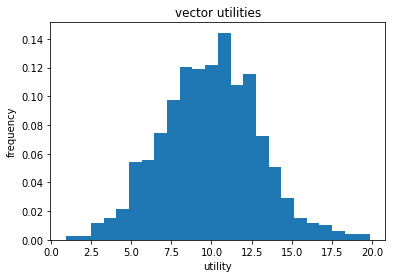

In [7]:
plt.hist(vector_utilities, bins = 'auto', normed = 1) 
plt.xlabel('utility')
plt.ylabel('frequency')
plt.title('vector utilities')
#Bins = 'auto' gives the relative frequencies on the y-axis instead of the absolute frequencies

#### d) [0.5 points] Complete the following function which gives for each price `p` the demand (number of consumers willing to buy at price `p`.

[hint 1: what must be true for an element in `vector_utilities` for this consumer to buy the product?]

[hint 2: part of what you learned under a) may be useful here]

In [8]:
p = np.arange(0.0,10.1,0.1)
x = vector_utilities[0:1000]
def demand2(p):
    return x
#Consumers will buy a product if the utility they gain from buying the product is equal or larger than the price they have to pay.
#However, I don't know how to convert the vector into a list of variables.

#### e) [0.5 points] Plot this demand function. Recall that economists tend to put quantity on the horizontal axis and price on the vertical axis.

[hint: if for some reason you could not solve d) work with the following --incorrect-- demand function:

`def demand(p):
   return 1000-p`

to finish the exam.]

Text(0,0.5,'Price')

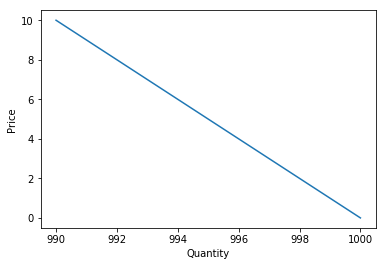

In [9]:
def demand(p):
    return 1000-p
plt.plot(demand(np.arange(0.0,10.1,0.1)), np.arange(0.0,10.1,0.1))
plt.xlabel('Quantity')
plt.ylabel('Price')
#Since I couldn't find the correct formula, I use the wrong one. 
#By inserting the demand function first and p second, I ensure that price is on the vertical axis and quantity on the horizontal.

Assume that there is a fixed supply of 400 units of this product. Consider the following function `excess demand`.

In [10]:
supply = 400
def excess_demand(p):
    return demand(p)-supply

#### f) [0.5 points] Use a numerical solver to solve for the equilibrium price. Use the figure under e) to give a reasonable starting point for the numerical solver.

[hint: what must be true for `excess_demand` at the equilibrium price?]

In [11]:
a = optimize.fsolve(excess_demand, 0)
print(a)
#At the equilibrium price, demand equals supply. Since supply is fixed at 400, demand should also equal 400.
#Therefore, there will be no excess demand, so excess_demand(p) should equal zero. Thus, we need to find the root of this function.
#optimize.fsolve should give us the right answer, but returns 600.

[600.]


## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.